In [32]:
import seaborn as sns
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

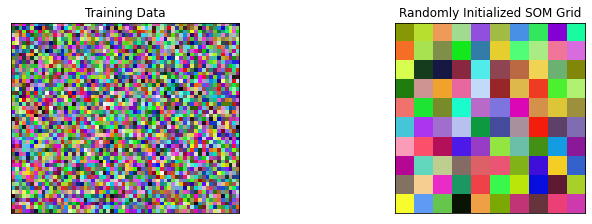

In [4]:
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))
# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

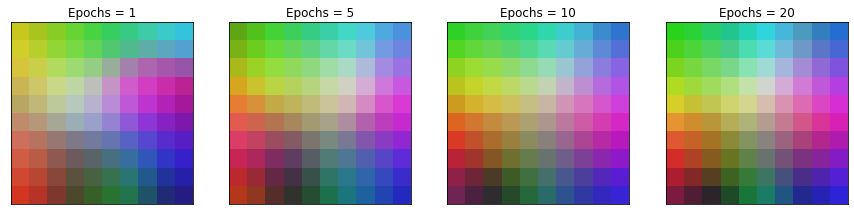

In [5]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [6]:
""""""

''

In [111]:
penguins = pd.read_csv("penguins.csv")
penguins = penguins.dropna()
penguins

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


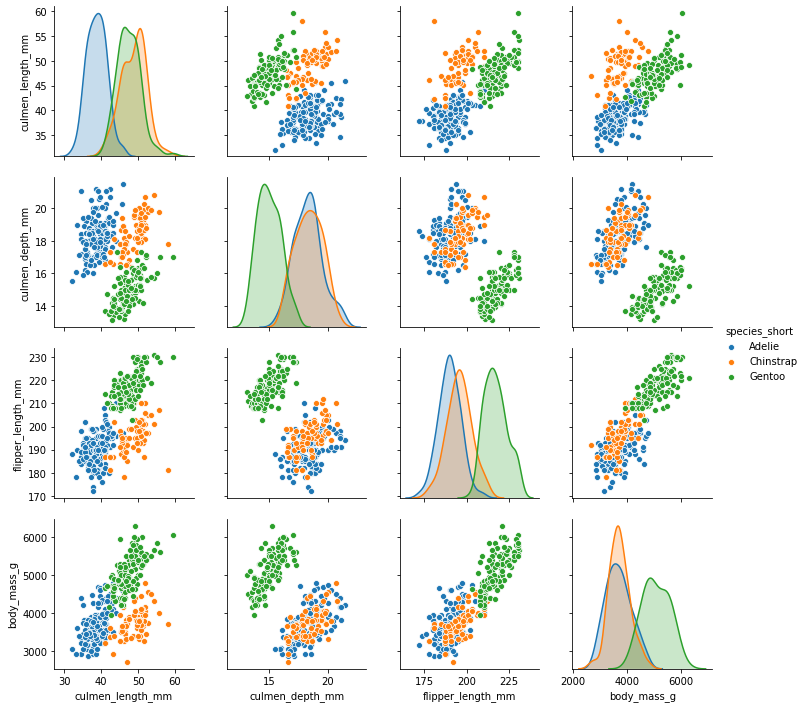

In [112]:
#add SOM as diff colour

x = sns.pairplot(penguins, hue='species_short')
x.savefig('penguins.png')

In [149]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [150]:
# Dimensions of the SOM grid
m = 10
n = 10

#training set
train_data = scaled_penguin_data

# Initialize the SOM randomly
rand = np.random.RandomState(0)
SOM = rand.randint(-1, 1, (m, n, 4)).astype(float)

#update SOM
SOM = train_SOM(SOM, train_data, epochs=40)

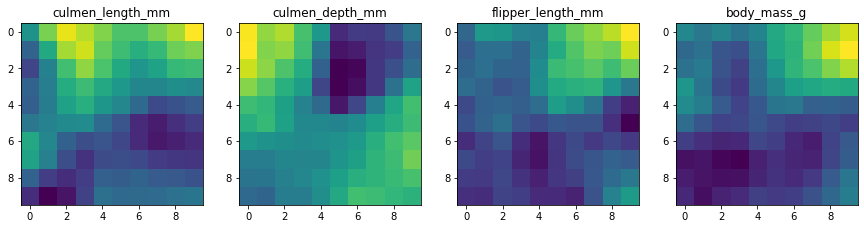

In [151]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5))

for i in range(4):
    ax[i].imshow(SOM[:, :,i])

ax[0].title.set_text('culmen_length_mm')
ax[1].title.set_text('culmen_depth_mm')
ax[2].title.set_text('flipper_length_mm')
ax[3].title.set_text('body_mass_g')

In [153]:
data = []

for i in range(10):
    for j in range(10):
        data.append(np.concatenate((['SOM'],SOM[i,j])))

df = pd.DataFrame(data, columns=['species_short', 'culmen_length_mm', 'culmen_depth_mm',\
                  'flipper_length_mm','body_mass_g'])

In [154]:

penguin_data = penguins[
    ["species_short",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

reduced = StandardScaler().fit_transform(penguin_data[:,1:])

data = []
for i in range(len(penguin_data)):
    data.append(np.concatenate(([penguin_data[i][0]],reduced[i])))

df2 = pd.DataFrame(data, columns=['species_short', 'culmen_length_mm', 'culmen_depth_mm',\
                  'flipper_length_mm','body_mass_g'])
    

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [155]:
penguins2 = df2.append(df)

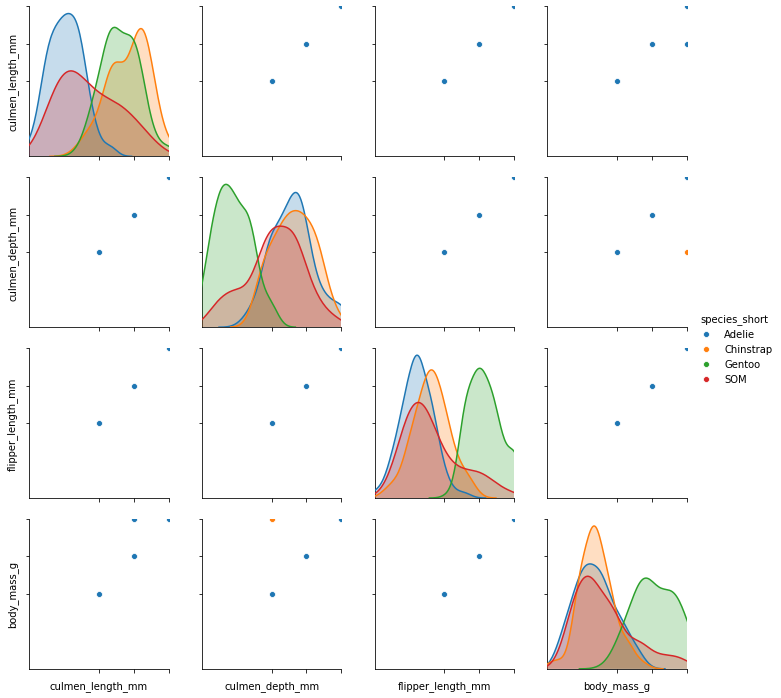

In [164]:
g = sns.pairplot(penguins2, hue='species_short')
g.set(xticklabels=[])
g.set(yticklabels=[])

g.axes[0,0].set_xlim((-2,2))
g.axes[1,1].set_xlim((-2,2))
g.axes[2,2].set_xlim((-2,2))
g.axes[3,3].set_xlim((-2,2))

g.axes[0,0].set_ylim((-2,2))
g.axes[1,1].set_ylim((-2,2))
g.axes[2,2].set_ylim((-2,2))
g.axes[3,3].set_ylim((-2,2))

g.savefig('penguins_som2.png')